## Train a SamLoRA model for building detection

### Import libraries

In [1]:
from arcgis.learn import prepare_data, SamLoRA
from arcgis.gis import GIS

2025-02-10 19:29:58.274137: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
gis = GIS("home")

### Prepare the image chips for training

Different models have different image chip [metadata formats](https://pro.arcgis.com/en/pro-app/latest/tool-reference/image-analyst/overview-of-the-deep-learning-models.htm). [SamLoRA](https://developers.arcgis.com/python/latest/api-reference/arcgis.learn.toc.html#samlora) requires Classified tiles.

In [3]:
dataPath = r'/arcgis/home/Building Detection with SAM/DLTrainingSamples_3Band_ClassifiedTiles'

In [4]:
data = prepare_data(dataPath, batch_size=16, chip_size=112, class_mapping={'1': 'Building'})

### Train the SamLoRA model

The [Segment Anything Model (SAM)](https://arcg.is/0DHOrn) is available for download through the ArcGIS Living Atlas of the world. [SAM is a ground breaking aim](https://ai.meta.com/blog/segment-anything-foundation-model-image-segmentation/) at creating a [foundational model](https://aws.amazon.com/what-is/foundation-models/) for image segmentation. 

Notice that [the guide for SAM](https://doc.arcgis.com/en/pretrained-models/latest/imagery/using-segment-anything-model-sam-.htm) does not state that this pretrained model can not be pre-trained. This is due to the complexities of the model. 

However, the SamLoRA model allows the user to fine-tune the model:
> SamLoRA, a variation of SAM that adds a set of trainable layers called Low-Rank Adaption (LoRA) to the frozen image encoder of SAM.

Previously when fine-tuning a model `MaskRCNN.from_model(dlpk, data)` was used. With SamLoRA, you select one of three backbones, `vit_b`, `vit_h`, and `vit_l`, and train the model to fine-tune the SAM using a Low-Rank Adaptation technique. Here is a discussion of [fine-tuning a SAM model using SamLoRA](https://developers.arcgis.com/python/latest/guide/finetune-sam-using-samlora/) and [here is an example](https://developers.arcgis.com/python/latest/samples/finetuning-sam-for-flood-inundation-mapping). There is no need to call upon the SAM deep learning package to fine-tune this pre-trained model. It's accessible via the backbone. Further, if you fine-tuned SAM using SamLoRA, like what happens below, you can use that as a pre-trained model later for another task. Then the code would look like what we saw before, such as `SamLoRA.from_model(dlpk, data)`.

#### Explore the 3 backbones

[This paper](https://arxiv.org/pdf/2304.02643) introduces the Segment Anything Model. [When using SAM](https://github.com/facebookresearch/segment-anything?tab=readme-ov-file#model-checkpoints), you choose which model backbone to use. Each balances performance and accuracy.

##### ViT-B (base)

In [5]:
model_vit_b = SamLoRA(data, backbone='vit_b')

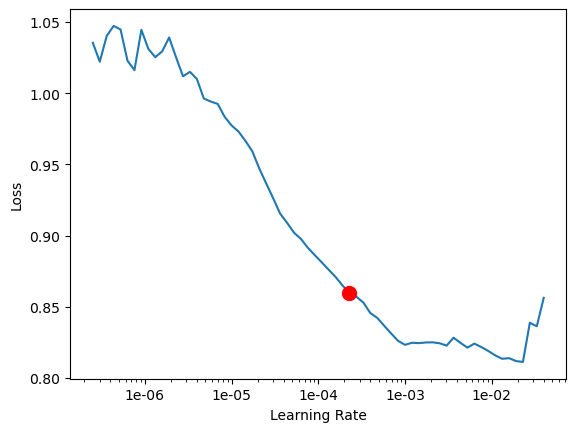

0.00022908676527677726

In [6]:
lr = model_vit_b.lr_find()
lr.real

In [7]:
model_vit_b.fit(epochs=20, lr=lr.real)

epoch,train_loss,valid_loss,accuracy,dice,time
0,0.766154,0.719844,0.790773,0.269786,00:07
1,0.722813,0.653877,0.784503,0.378525,00:07
2,0.685931,0.541050,0.857283,0.471413,00:07
3,0.635108,0.485208,0.864085,0.530069,00:07
4,0.558369,0.381234,0.924327,0.609926,00:07
5,0.493254,0.365776,0.922623,0.628303,00:07
6,0.450338,0.336159,0.933694,0.641069,00:07
7,0.416760,0.347881,0.918370,0.649049,00:07
8,0.395898,0.325942,0.929332,0.664420,00:07
9,0.378188,0.324266,0.932305,0.663185,00:07


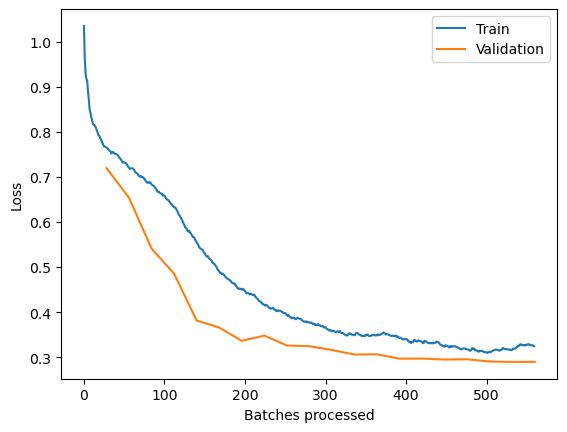

In [8]:
model_vit_b.plot_losses()

Not all models have the same methods, properties, and in this case [model metrics](https://developers.arcgis.com/python/latest/api-reference/arcgis.learn.toc.html#arcgis.learn.SamLoRA.available_metrics). Always check the API for Python help documentation when using a model.

In [9]:
model_vit_b.accuracy()

0.9402120113372803

##### ViT-L (large)

In [10]:
model_vit_l = SamLoRA(data, backbone='vit_l')

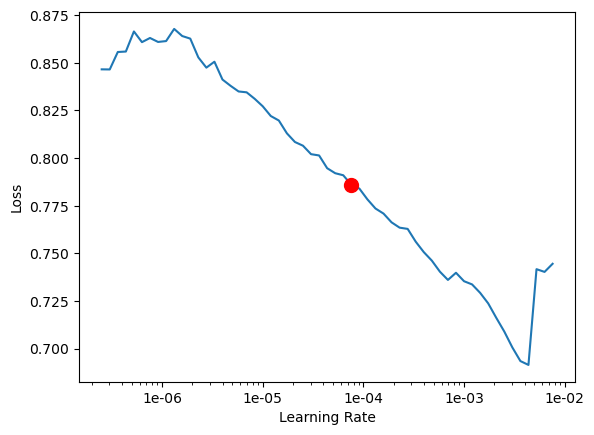

7.585775750291836e-05

In [11]:
lr = model_vit_l.lr_find()
lr.real

In [12]:
model_vit_l.fit(epochs=20, lr=lr.real)

epoch,train_loss,valid_loss,accuracy,dice,time
0,0.759475,0.660066,0.786655,0.354055,00:22
1,0.702094,0.593670,0.833637,0.437542,00:22
2,0.665112,0.536920,0.826285,0.476803,00:22
3,0.630991,0.486236,0.849627,0.529219,00:22
4,0.583628,0.417733,0.904702,0.579567,00:22
5,0.543626,0.393746,0.891014,0.616780,00:22
6,0.497753,0.358509,0.918460,0.624478,00:22
7,0.462156,0.329582,0.939417,0.655108,00:22
8,0.429428,0.320827,0.932583,0.678412,00:22
9,0.411822,0.316516,0.939230,0.680896,00:22


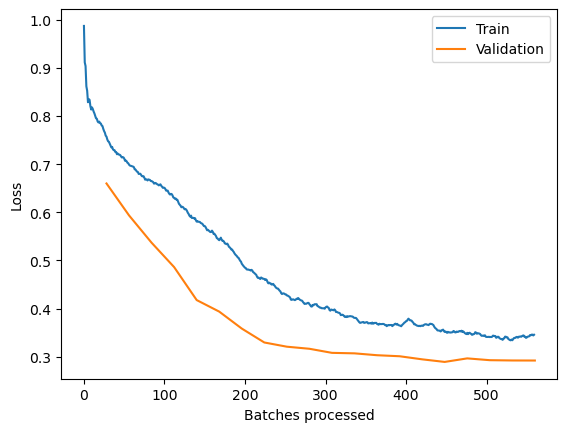

In [13]:
model_vit_l.plot_losses()

In [14]:
model_vit_l.accuracy()

0.9467521905899048

##### ViT-H (huge)

In [15]:
model_vit_h = SamLoRA(data, backbone='vit_h')

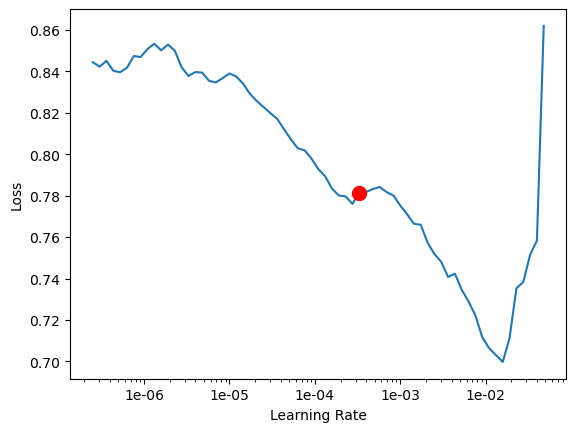

0.0003311311214825911

In [16]:
lr = model_vit_h.lr_find()
lr.real

> Dice in training a deep learning model is the Dice Similarity Coefficient, or F1 Score. Think of it like over lap on a scale of 0 to 1. 0 indicates no overlap between the predicted segment and the ground truth data, while 1 indicates perfect overlap.

In [17]:
model_vit_h.fit(epochs=20, lr=lr.real)

epoch,train_loss,valid_loss,accuracy,dice,time
0,0.733782,0.688772,0.804420,0.290779,00:45
1,0.681749,0.563196,0.817659,0.468783,00:45
2,0.616313,0.421439,0.902167,0.595696,00:45
3,0.524377,0.322065,0.939920,0.673418,00:45
4,0.448797,0.283717,0.945316,0.708076,00:45
5,0.396108,0.263125,0.951886,0.725554,00:45
6,0.371400,0.266411,0.947490,0.735661,00:45
7,0.344034,0.246615,0.951725,0.759993,00:46
8,0.326900,0.240913,0.956574,0.752871,00:45
9,0.321680,0.242246,0.953659,0.749518,00:45


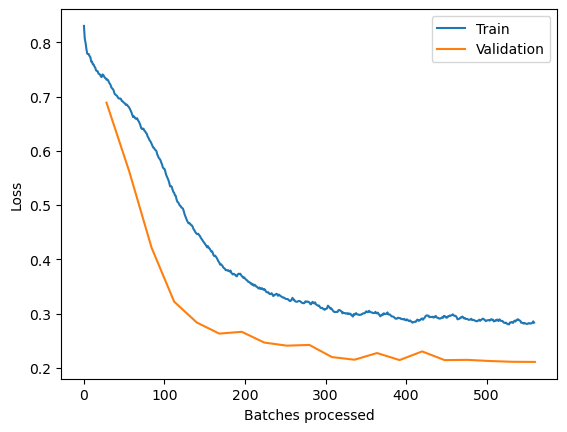

In [18]:
model_vit_h.plot_losses()

In [19]:
model_vit_h.accuracy()

0.9579862356185913